#### EDA and a Case Study t work with
#### Exploratory Data Analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd # Data preprocessings
import matplotlib.pyplot as plt  # Data Visualisation
import seaborn as sns  # Data Visualisation
from collections import Counter # Counting
import missingno as msno # Missing data - Data Visualisation

In [2]:
!pip install missingno

In [3]:
# load data set
data_df = pd.read_csv(r"C:\Users\User\Desktop\10Alytics Data Science\Lessons\Week 12\Week 12 WMDIV\Dune Sales Data.csv")


In [4]:
# print the top row
data_df.head(10) # head() by default prints top 5

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67
5,8-Apr-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,66.00,78.00
6,17-Apr-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,52.00,60.00
7,17-Apr-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,60.00,68.00
8,22-Jun-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,8.00,10.00
9,22-Jun-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,2.50,3.00


In [5]:
# print the bottom row
data_df.tail() # tail() by default prnts botton 5

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### dimensionality : number of rows and columns 

In [6]:
data_df.shape

(34867, 12)

In [7]:
# examine columns or features of the data
# columns are also known as features
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [8]:
# investigate the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


#### Numerical  and Categorical Statistical Analysis

In [9]:
# Numerical Statistical Analysis
# considers only numerical columns
data_df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [10]:
# Categorical Statistical Analysis
# considers other columns that are not numerical
data_df.describe(include=["object","bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


#### Dealing with Missing Data
MCAR : missing completely at random
MAR : missing at random. These values are dependent on some additional features
MNAR : missing not at random. These values are dependent on the missingness mechanism itself.
The missing data mechanism is a crucial aspect of data analysis, and understanding the type of missing data is
essential for choosing the appropriate method to handle it.
### Step 3: Handling Missing Data
There are several methods to handle missing data, including:
- Listwise deletion: This method involves deleting all cases with missing values for a particular variable.
- Pairwise deletion: This method involves deleting all cases with missing values for a particular pair of variables
- Mean/Median/Mode imputation: This method involves replacing missing values with the mean, median
or mode of the variable.
- Regression imputation: This method involves using a regression model to predict the missing values.
- Multiple imputation: This method involves creating multiple versions of the dataset with different
imputed values for the missing data.
### Step 4: Choosing the Right Method
The choice of method depends on the type of missing data and the research question. For example, if
the missing data is MCAR, listwise deletion or mean/median/mode imputation may be
appropriate. If the missing data is MAR, regression imputation or multiple imputation may be more
appropriate.
### Step 5: Evaluating the Results
After handling the missing data, it's essential to evaluate the results to ensure that the method used did
not introduce any bias or affect the conclusions drawn from the data.
### Step 6: Documenting the Process
It's essential to document the process of handling missing data, including the type of missing data, the
method used, and the results. This will help to ensure transparency and reproducibility of the analysis
### Step 7: Checking for Assumptions
Before performing any statistical analysis, it's essential to check for assumptions such as normality, linearity
and homoscedasticity. If these assumptions are not met, it may be necessary to transform
the data or use a different statistical method.
### Step 8: Interpreting the Results
After performing the statistical analysis, it's essential to interpret the results in the context of the research
question and the data. This will help to ensure that the conclusions drawn from the data are valid and
meaningful.


In [11]:
# Investigating the missing data
null_vals = data_df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

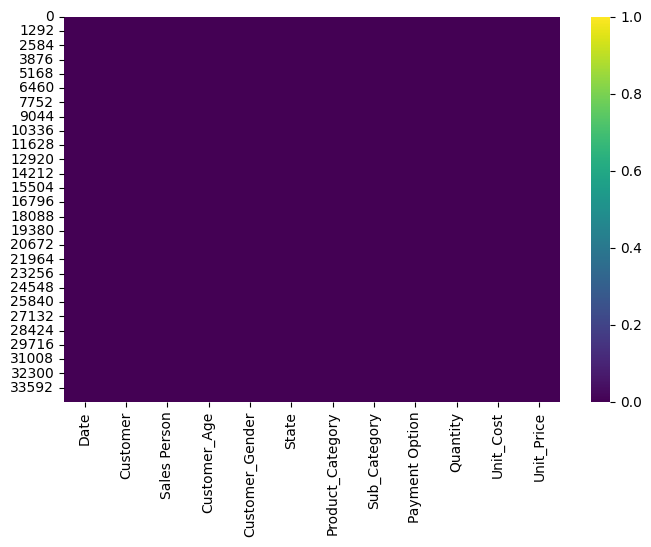

In [12]:
# Visualize the missing data
plt.figure(figsize=(8,5))
sns.heatmap(data_df.isnull(),cbar=True,cmap='viridis');

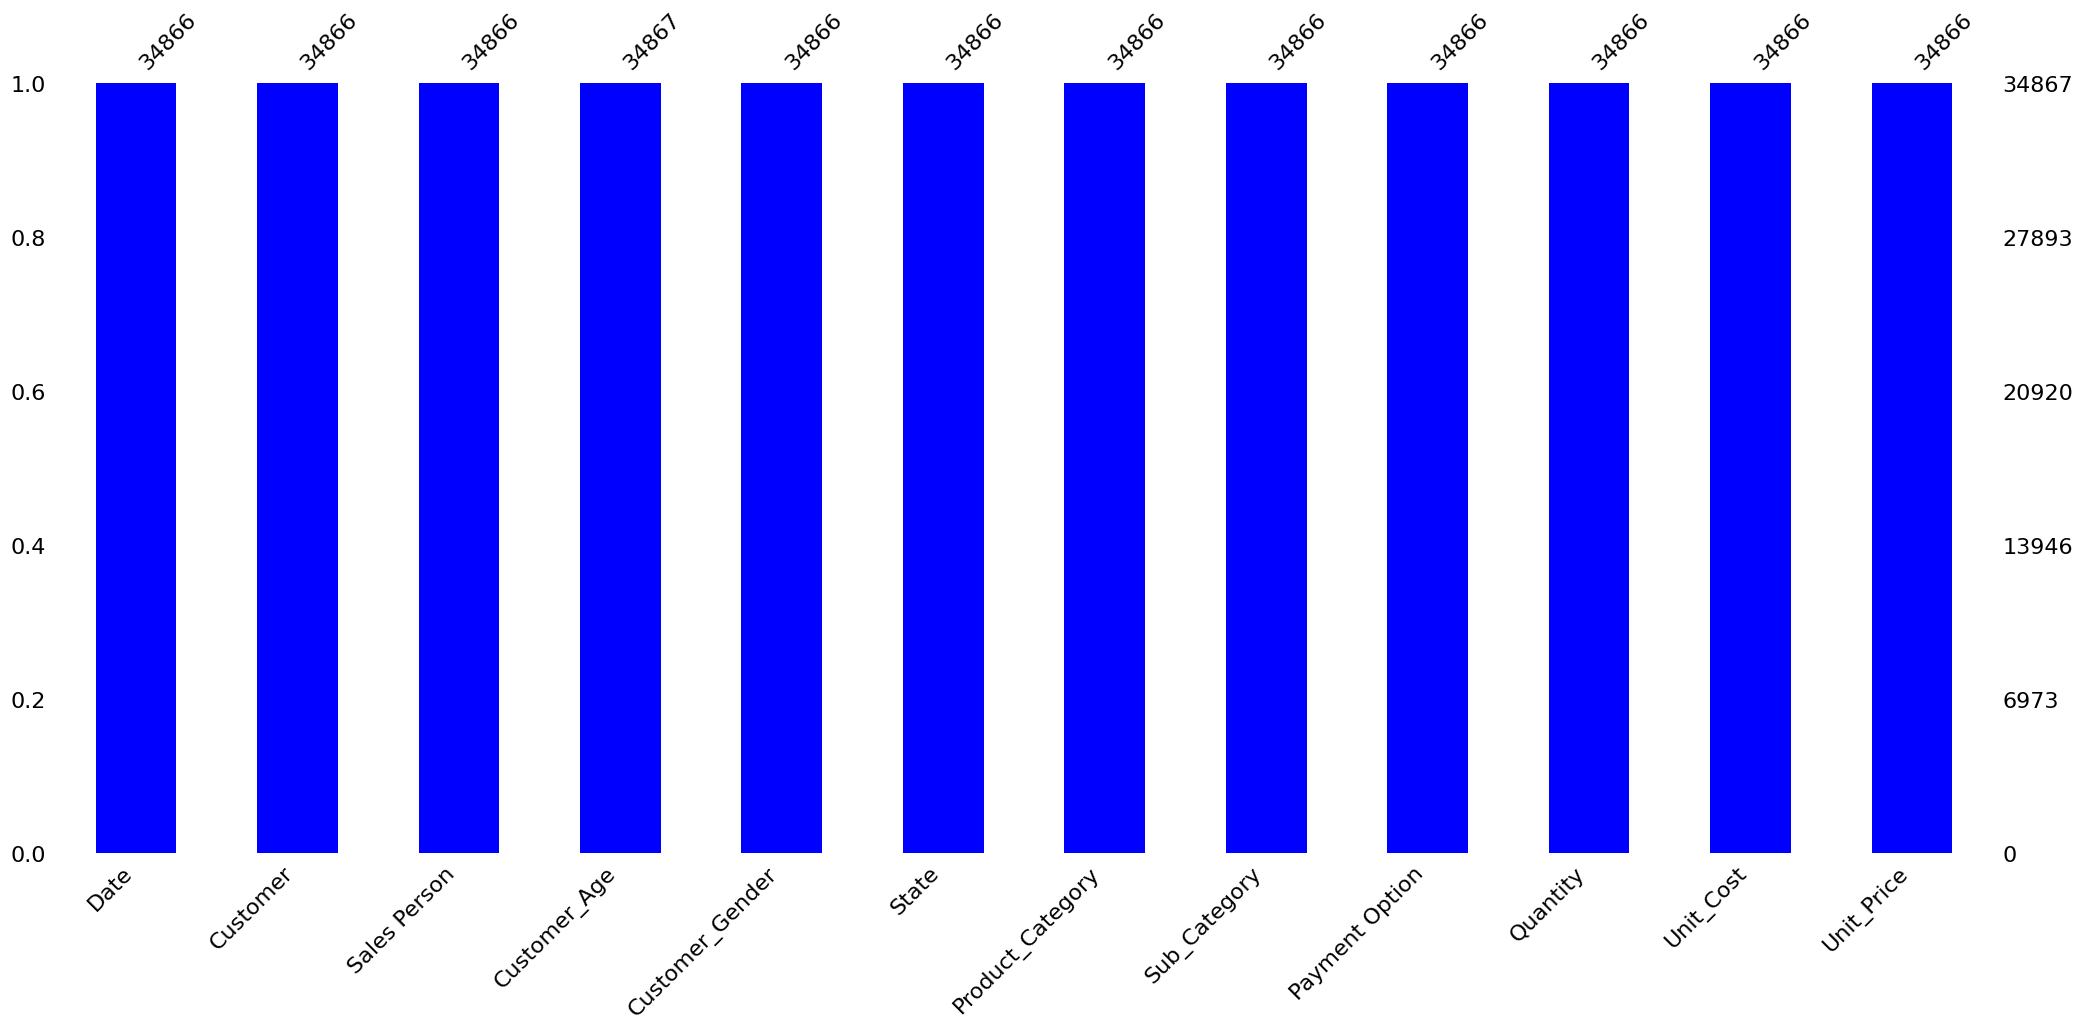

In [13]:
msno.bar(data_df, color="blue");

In [14]:
# Display where missing data exist in the data
data_df[data_df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Drop the missing data
# Always specify the insplace = True
data_df.dropna(inplace=True)
data_df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

#### DateTime Analysis
The datetime analysis is used to analyze the time series data. It is used to extract the time component
from the data and perform various operations on it.



In [16]:
# DateTime Analysis
data_df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [17]:
# Convert the Date column into a pandas DateTime object
data_df['Date'] = pd.to_datetime(data_df['Date'])


C:\Users\User\AppData\Local\Temp\ipykernel_33872\398916133.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_df['Date'] = pd.to_datetime(data_df['Date'])


In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [19]:
# Extract yera, month and quarter
# Create new columns for year
data_df['Year'] = data_df['Date'].dt.year
# Create new columns for month 
data_df['Month'] = data_df['Date'].dt.month
# Create new columns for year, month and quater
data_df['MonthName'] = data_df['Date'].dt.month_name()
# Create new columns for year, month and quater
data_df['Quater'] = data_df['Date'].dt.quarter

data_df.head()




,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,MonthName,Quater
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1


#### Group Customer Age

In [20]:
# Creating groups for customer age
# Create a function to use for interval classification

def age_group(x):
    if x <= 25:
        return 'Young Adult'
    elif x <= 40:
        return 'Adult'
    elif x <= 50:
        return 'Old Adult'
    else:
        return 'Elder'
    
# Apply the funtion to the data
data_df['Age Group'] = data_df['Customer_Age'].apply(age_group)
data_df.head()



,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,Year,Month,MonthName,Quater,Age Group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,Adult
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,Adult
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,Adult
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,Adult


#### Calculate Profit and Loss

In [21]:
# Profit and loss 
# Create new columns for total cost and total price

data_df["Total_Cost"] = data_df["Unit_Cost"]  * data_df["Quantity"]
data_df["Total_Price"] = data_df["Unit_Price"]  * data_df["Quantity"]

# Create a Profit and loss column
data_df["Profit"] = data_df["Total_Price"] - data_df["Total_Cost"]
# Create a labelled Profit/Loss column using a function
def profit_loss(x):
    if x > 0 :
        return "Profit"
    else:
        return "Loss"
data_df["Profit/Loss"] = data_df["Profit"].apply(profit_loss)
data_df.head()




,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Year,Month,MonthName,Quater,Age Group,Total_Cost,Total_Price,Profit,Profit/Loss
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,Adult,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,Adult,49.00,57.00,8.00,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,Adult,11.01,15.00,3.99,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,Adult,175.00,233.00,58.00,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,Adult,105.00,125.01,20.01,Profit


#### Univariate Analysis
The first step in analyzing the data is to perform univariate analysis. This involves examining the distribution of
each variable to understand its characteristics. Or can can be said to be analysing each column or feature individually.

Numerical Column/Feature = Numerical Visualization Techniques <br>
Categorical Column/Feature = Categorical Visualization Techniques



In [22]:
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

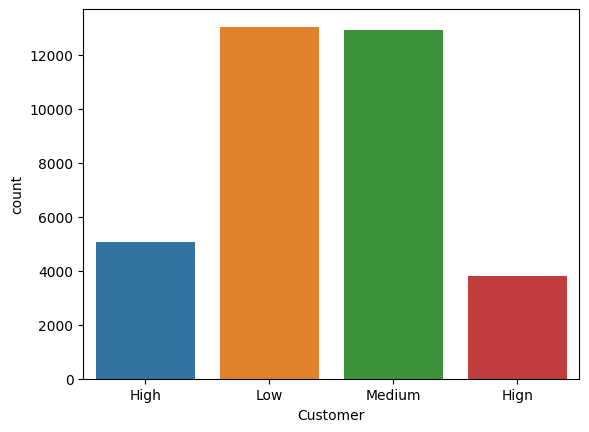

In [23]:
# how many customers belong to each customer spec
sns.countplot(x="Customer", data = data_df);
# Hign in the resultant plot is an error in the data column Customer. 
# In the next cell, we try to fix it.

In [24]:
# Investigate the columns affected
data_df[data_df["Customer"] == "Hign"].head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Year,Month,MonthName,Quater,Age Group,Total_Cost,Total_Price,Profit,Profit/Loss
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,Adult,2295.00,2136.00,-159.00,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,Adult,35.00,39.00,4.00,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,Adult,50.01,56.01,6.00,Profit
29773,2015-08-10,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,1.0,...,69.00,2015,8,August,3,Adult,60.00,69.00,9.00,Profit
29774,2015-08-25,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,47.00,2015,8,August,3,Adult,125.01,141.00,15.99,Profit


C:\Users\User\AppData\Local\Temp\ipykernel_33872\63445529.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data_df.loc[data_df["Customer"] == "Hign"] = "High"
C:\Users\User\AppData\Local\Temp\ipykernel_33872\63445529.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_df.loc[data_df["Customer"] == "Hign"] = "High"
C:\Users\User\AppData\Local\Temp\ipykernel_33872\63445529.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_df.loc[data_df["

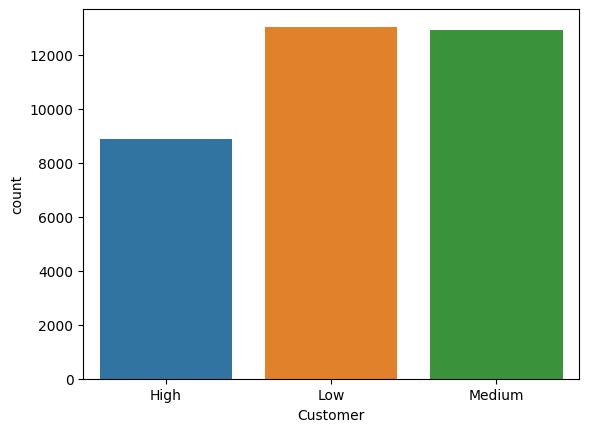

In [25]:
# correct the spelling of HIGN
data_df.loc[data_df["Customer"] == "Hign"] = "High"
sns.countplot(x="Customer", data = data_df);

In [26]:
# value of counts method
data_df["Customer"].value_counts()


Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

Dominant Customer Types: The count plot reveals that certain customers have significantly higher occurrences, indicating they are the most common in the dataset, while others are much less frequent.

Potential Outliers: There are customer categories with very low counts, suggesting they may be outliers or represent rare cases, warranting further investigation.

Data Quality Check: The presence of unexpected or misspelled customer categories in the count plot may indicate data quality issues that need to be addressed.

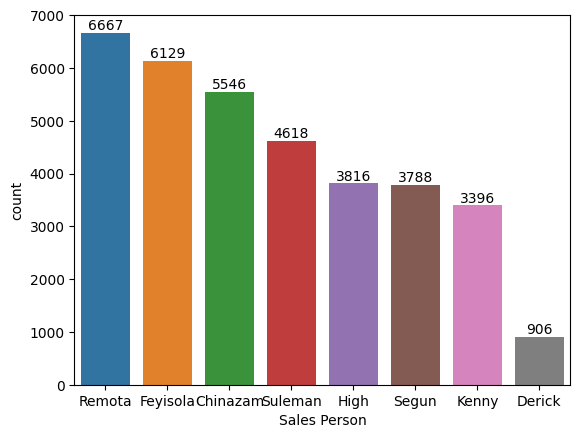

In [27]:
# Sale person column - How many transactions was completed by each sale person
ax = sns.countplot(x=data_df["Sales Person"], order=data_df["Sales Person"].value_counts(ascending=False).index);
values = data_df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

Sales Performance: The count plot illustrates the number of transactions completed by each salesperson, highlighting which individuals are the top performers and which have lower transaction counts.

Transaction Distribution: There is a noticeable distribution of transactions among salespeople, with a few individuals handling a majority of the transactions, indicating potential disparities in workload or effectiveness.

Identifying Trends: The visualization can help identify trends in sales performance, such as consistent high performers or those who may require additional support or training to improve their transaction counts.

In [28]:
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

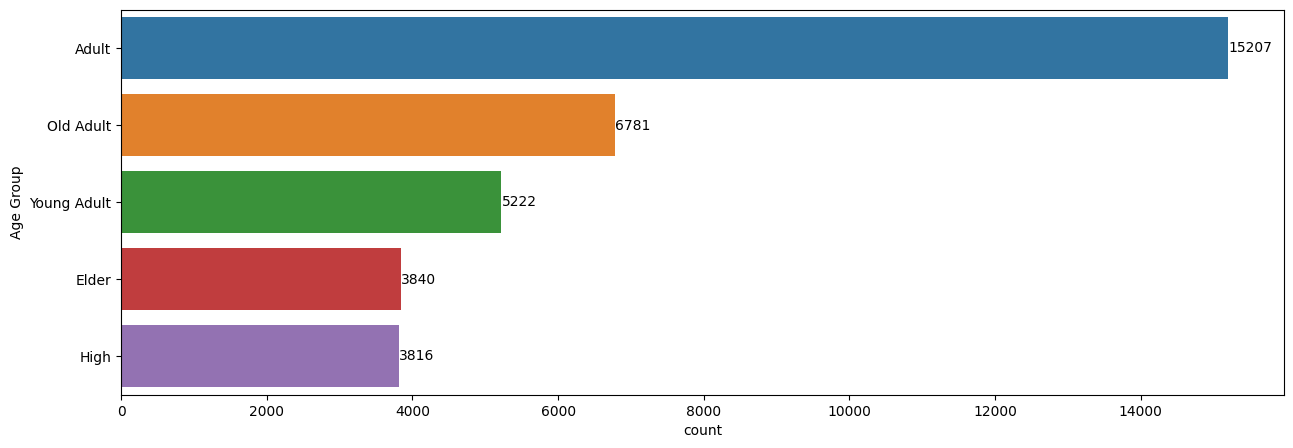

In [29]:
# Total transactions by Customer Age Group
# use plt.figure to increase the size
plt.figure(figsize=(15,5))
ax = sns.countplot(y=data_df["Age Group"], order=data_df["Age Group"].value_counts(ascending=False).index);
values = data_df["Age Group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [30]:
data_df["Age Group"].value_counts()

Age Group
Adult          15207
Old Adult       6781
Young Adult     5222
Elder           3840
High            3816
Name: count, dtype: int64

Age Group Distribution: The count plot displays the total number of transactions by customer age group, revealing which age groups are most active in terms of transactions and which are less active.

Dominant Age Groups: The visualization highlights the age groups that contribute the most to the total transactions, indicating potential target demographics for marketing or sales strategies.

Age-Related Trends: The plot can help identify trends in transaction behavior across different age groups, such as whether younger or older customers are more likely to engage in transactions, and inform strategies to cater to these groups.

In [31]:
# deleting duplicate rows
data_df.drop_duplicates(inplace = True)
# deleting the row , where Age Group column == "High"
data_df = data_df.drop(data_df[data_df['Age Group'] == 'High'].index)
# checking to see if the above commands works by viewing where Age Group column == "High"
data_df[data_df["Age Group"] == "High"].head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,Year,Month,MonthName,Quater,Age Group,Total_Cost,Total_Price,Profit,Profit/Loss


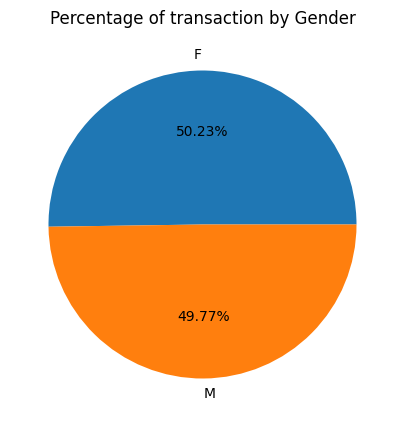

In [32]:
# Total transactions by customer gender
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data_df["Customer_Gender"])
ax.pie(count.values(), labels= count.keys(), autopct=lambda p:f"{p:.2f}%" );
ax.set_title("Percentage of transaction by Gender")
plt.show();


Gender Distribution: The pie chart illustrates the percentage of transactions completed by each gender, providing a clear visual representation of customer engagement based on gender.

Dominance of Gender: The chart likely reveals whether one gender significantly dominates the transaction counts, indicating potential preferences or biases in purchasing behavior, of which in this case, the percentage of transactions by both genders is almost thesame.


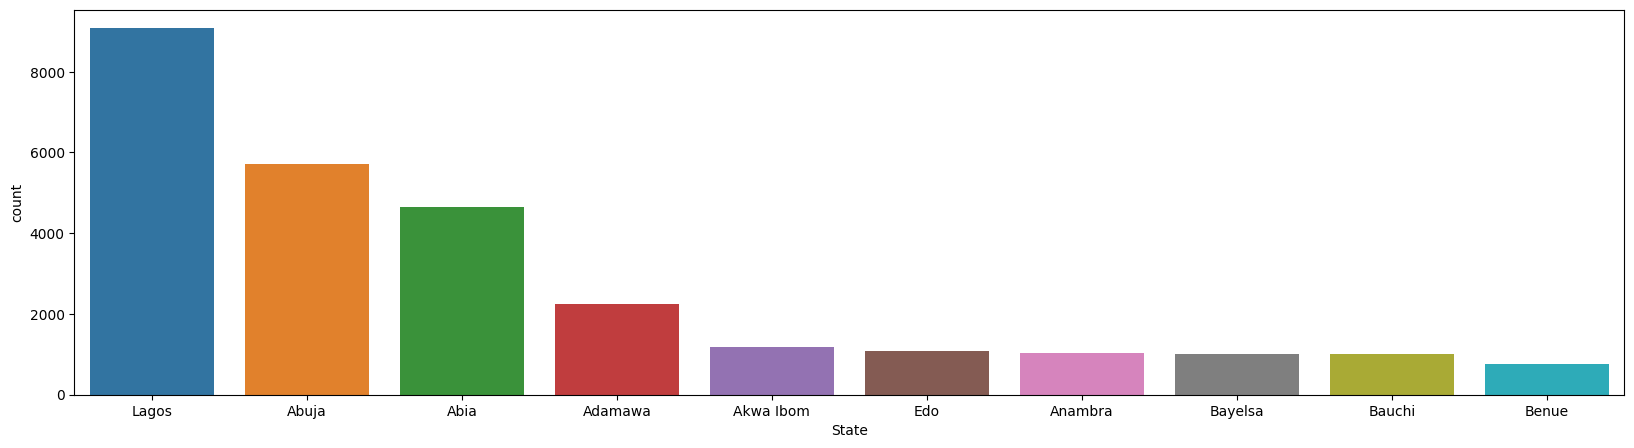

In [33]:
# Total transaction by state
plt.figure(figsize=(20,5))
# top ten states
top_ten = data_df["State"].value_counts().head(10)
sns.countplot(x="State", data = data_df, order= top_ten.index);

Dominance of Certain States: The count plot likely shows that a few states have significantly higher transaction counts compared to others, indicating that these states are major hubs for transactions.

Comparative Analysis: The visualization allows for a clear comparison among the top ten states, making it easy to identify which states are performing better in terms of transaction volume.An example will be Lagos, Abuja,Abia etc.


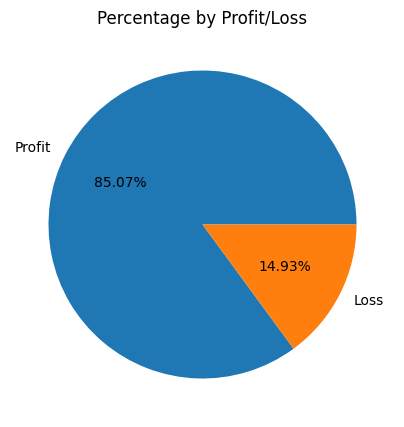

In [34]:
# Total transactions by Profit/Loss
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data_df["Profit/Loss"])
ax.pie(count.values(), labels= count.keys(), autopct=lambda p:f"{p:.2f}%" );
ax.set_title("Percentage by Profit/Loss")
plt.show();

Distribution of Profit and Loss: The pie chart will show the percentage of transactions that resulted in profit versus those that resulted in a loss. This can highlight whether the overall trend is more favorable (more profit) or unfavorable (more loss).

Proportional Insights: The chart allows for a quick visual assessment of the balance between profitable and unprofitable transactions, making it easy to identify which category dominates. For example, the profit section occupies a larger portion, these suggests that the majority of transactions were successful.

### Numerical Data Visualization

In [35]:
# veiw the columns
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


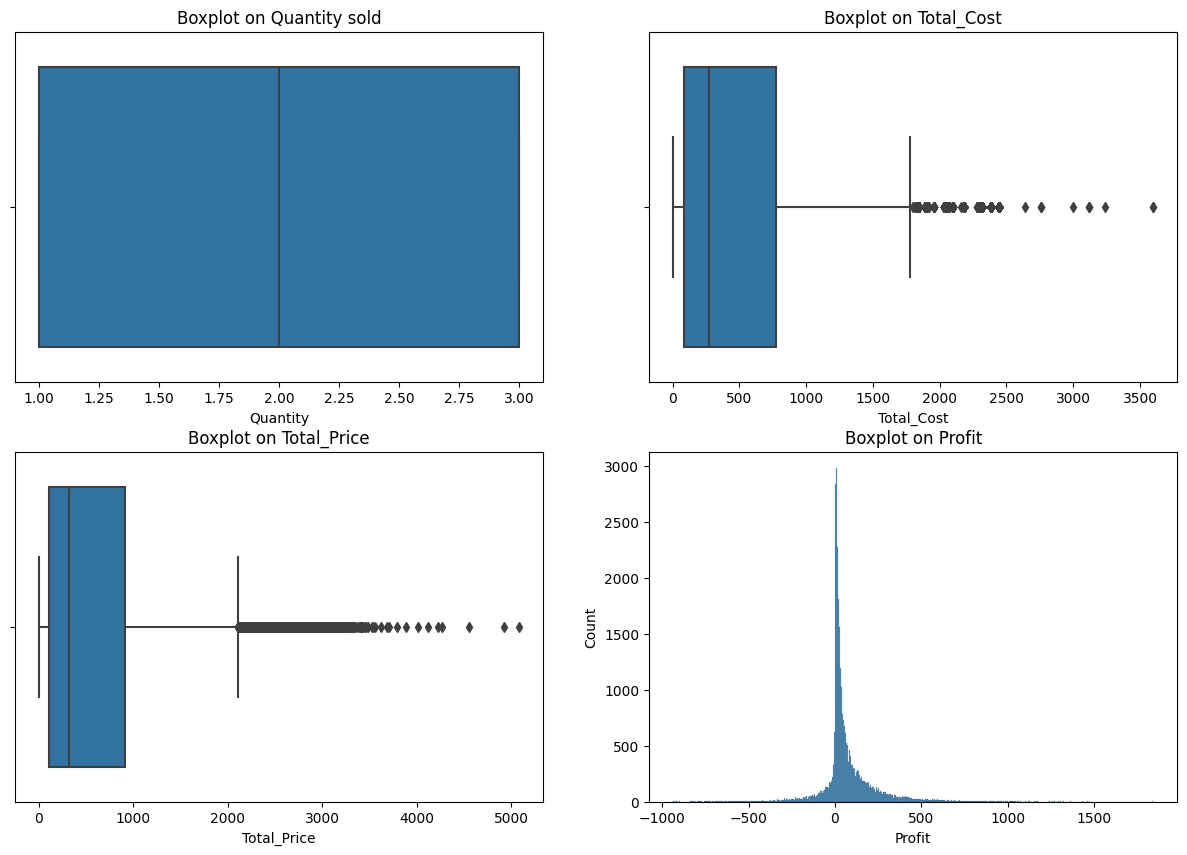

In [36]:
# Univariate Analysis for columns : Quantity, Total_Cost, Total_Price and Profit
# Subplot

fig, axs = plt. subplots(nrows=2 ,ncols=2, figsize=(15,10))
sns.boxplot(x= "Quantity", data= data_df, ax =axs[0,0])
axs[0,0].set_title("Boxplot on Quantity sold")

sns.boxplot(x= "Total_Cost", data= data_df, ax =axs[0,1])
axs[0,1].set_title("Boxplot on Total_Cost")

sns.boxplot(x= "Total_Price", data= data_df, ax =axs[1,0])
axs[1,0].set_title("Boxplot on Total_Price")

sns.histplot(x= "Profit", data= data_df, ax =axs[1,1])
axs[1,1].set_title("Boxplot on Profit") ;

Outlier Detection: The boxplots for Quantity, Total_Cost, and Total_Price will help identify any outliers in these variables. Outliers can significantly impact the analysis, and their presence may indicate unusual transactions or data entry errors. From the visualizations, we can easily see alot loads of outliers in both Total_Cost and Total_ Price.

Distribution Characteristics:

Quantity: The boxplot may reveal the central tendency (median) and spread (interquartile range) of quantities sold. A skewed distribution could indicate that most transactions involve low quantities, with a few high-volume transactions.
Total_Cost and Total_Price: Similar insights can be drawn regarding these variables, showing how costs and prices are distributed. For example, if the upper whisker is much longer than the lower whisker, it indicates a positive skew, suggesting higher values are more spread out.

#### bivariate Analysis
The bivariate analysis was conducted to examine the relationship between the two variables of interest. Eg Profit by gender.
In this discussion, we focus on profit.



In [37]:
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

#### Categorical Bivariate Analysis

''

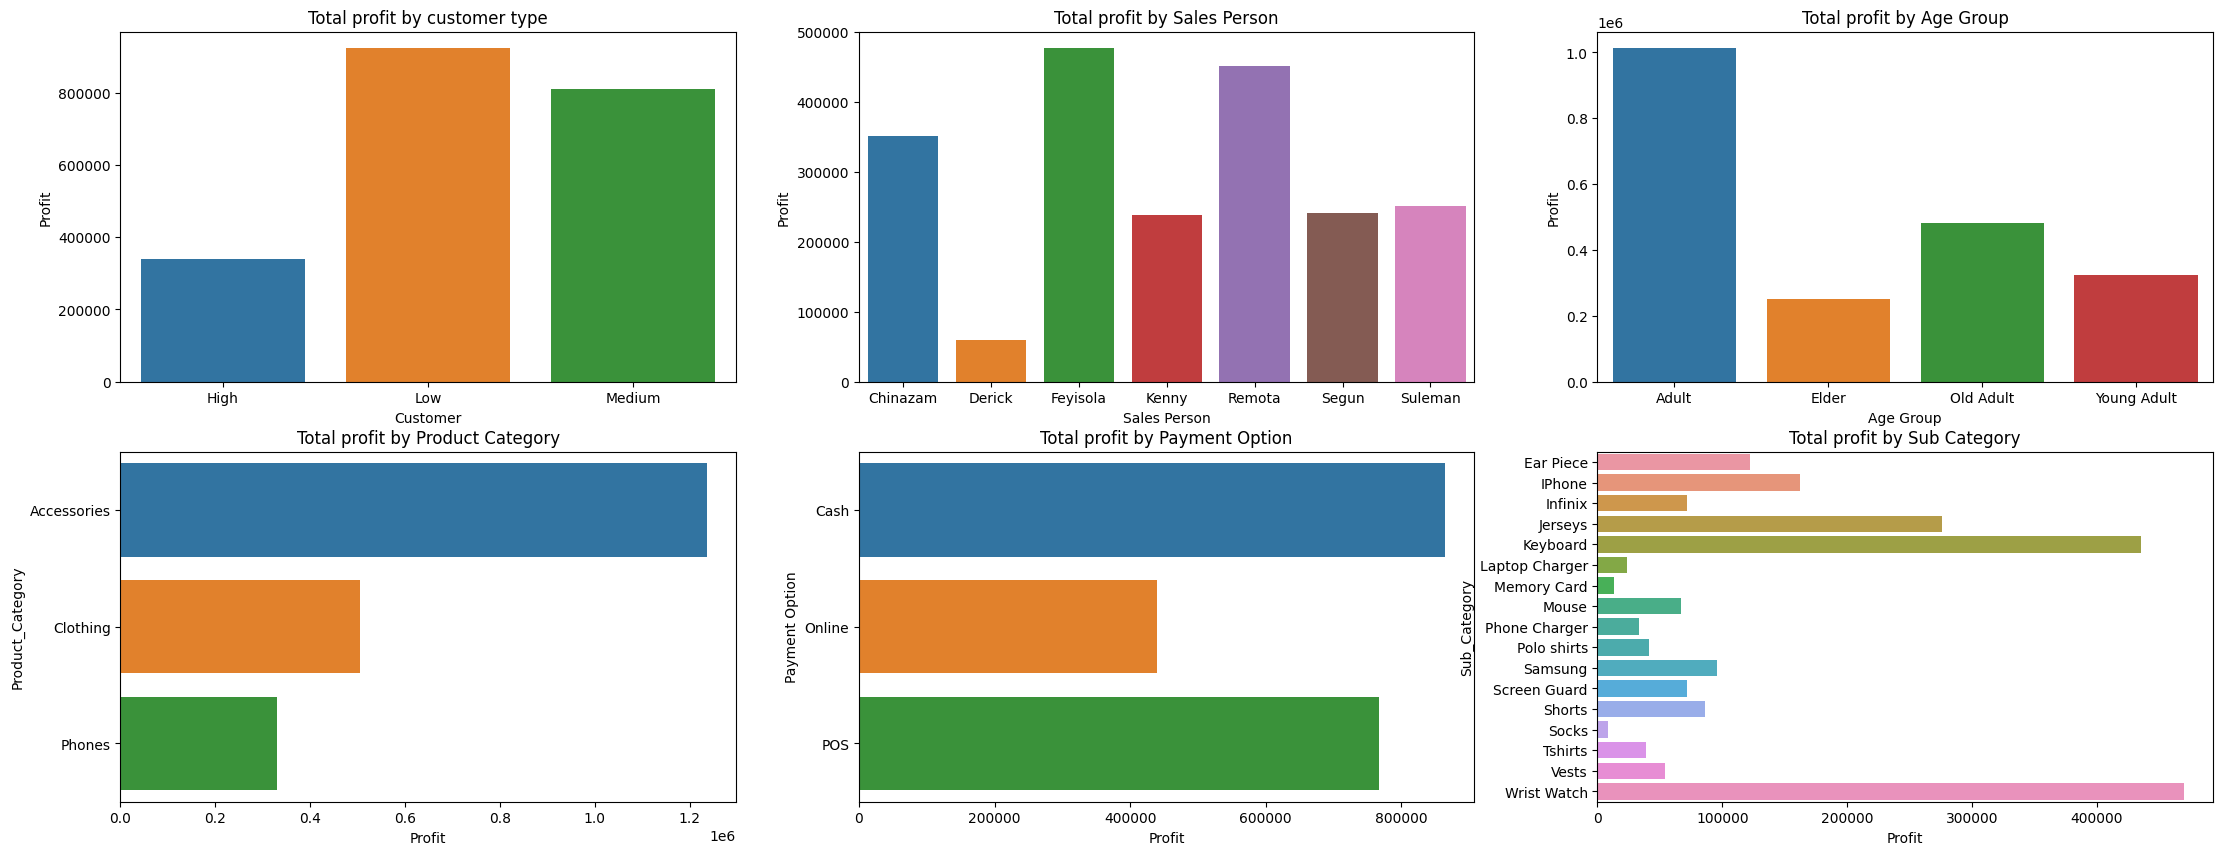

In [38]:
# Profit by customer
# Categorical Bivariate Analysis
# We create six visualizations
fig, axs = plt. subplots(nrows=2 ,ncols=3, figsize=(27,10))
# Group by profit of  customer
cust_prof = data_df.groupby("Customer")["Profit"].sum().reset_index()
sns.barplot(x="Customer", data=cust_prof, y="Profit", ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type")

sp_prof = data_df.groupby("Sales Person")["Profit"].sum().reset_index()
sns.barplot(x="Sales Person", data=sp_prof, y="Profit", ax=axs[0,1])
axs[0,1].set_title("Total profit by Sales Person")

ag_prof = data_df.groupby("Age Group")["Profit"].sum().reset_index()
sns.barplot(x="Age Group", data=ag_prof, y="Profit", ax=axs[0,2])
axs[0,2].set_title("Total profit by Age Group")

pc_prof = data_df.groupby("Product_Category")["Profit"].sum().reset_index()
sns.barplot(y="Product_Category", data=pc_prof, x="Profit", ax=axs[1,0])
axs[1,0].set_title("Total profit by Product Category")

po_prof = data_df.groupby("Payment Option")["Profit"].sum().reset_index()
sns.barplot(y="Payment Option", data=po_prof, x="Profit", ax=axs[1,1])
axs[1,1].set_title("Total profit by Payment Option")

sc_prof = data_df.groupby("Sub_Category")["Profit"].sum().reset_index()
sns.barplot(y="Sub_Category", data=sc_prof, x="Profit", ax=axs[1,2])
axs[1,2].set_title("Total profit by Sub Category")
;

CustomerType: The low catetogory holds the highest profit margins, these may also suggest that as the their price bracket is low, more people can afford purchase within that range, hence the high profit magrin. </br>
</br>
Sales Person: Feyisola, Remota performed best in sales, others falls into an average range except for Derick averaging at under 100,000.</br>
</br>
Age Group :Adult category performed best , while Elder category had the worse performance in terms of profit. </br>
</br>
Product Category: The barchart illustrates the profit margin by product category, where Accessories is the top performer and Phones is the least. </br>
</br>
Payment Option: The favourite medium of payment is cash averaging at over 800,000 in profit, Pos also performed good with just under 800,000 in profit also. </br>
</br>
Sub Category: Best performers will be Wrist watches,keyboards and jerseys. The least performance in profit is in socks.  


In [39]:
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

#### Numerical Bivariate Analysis

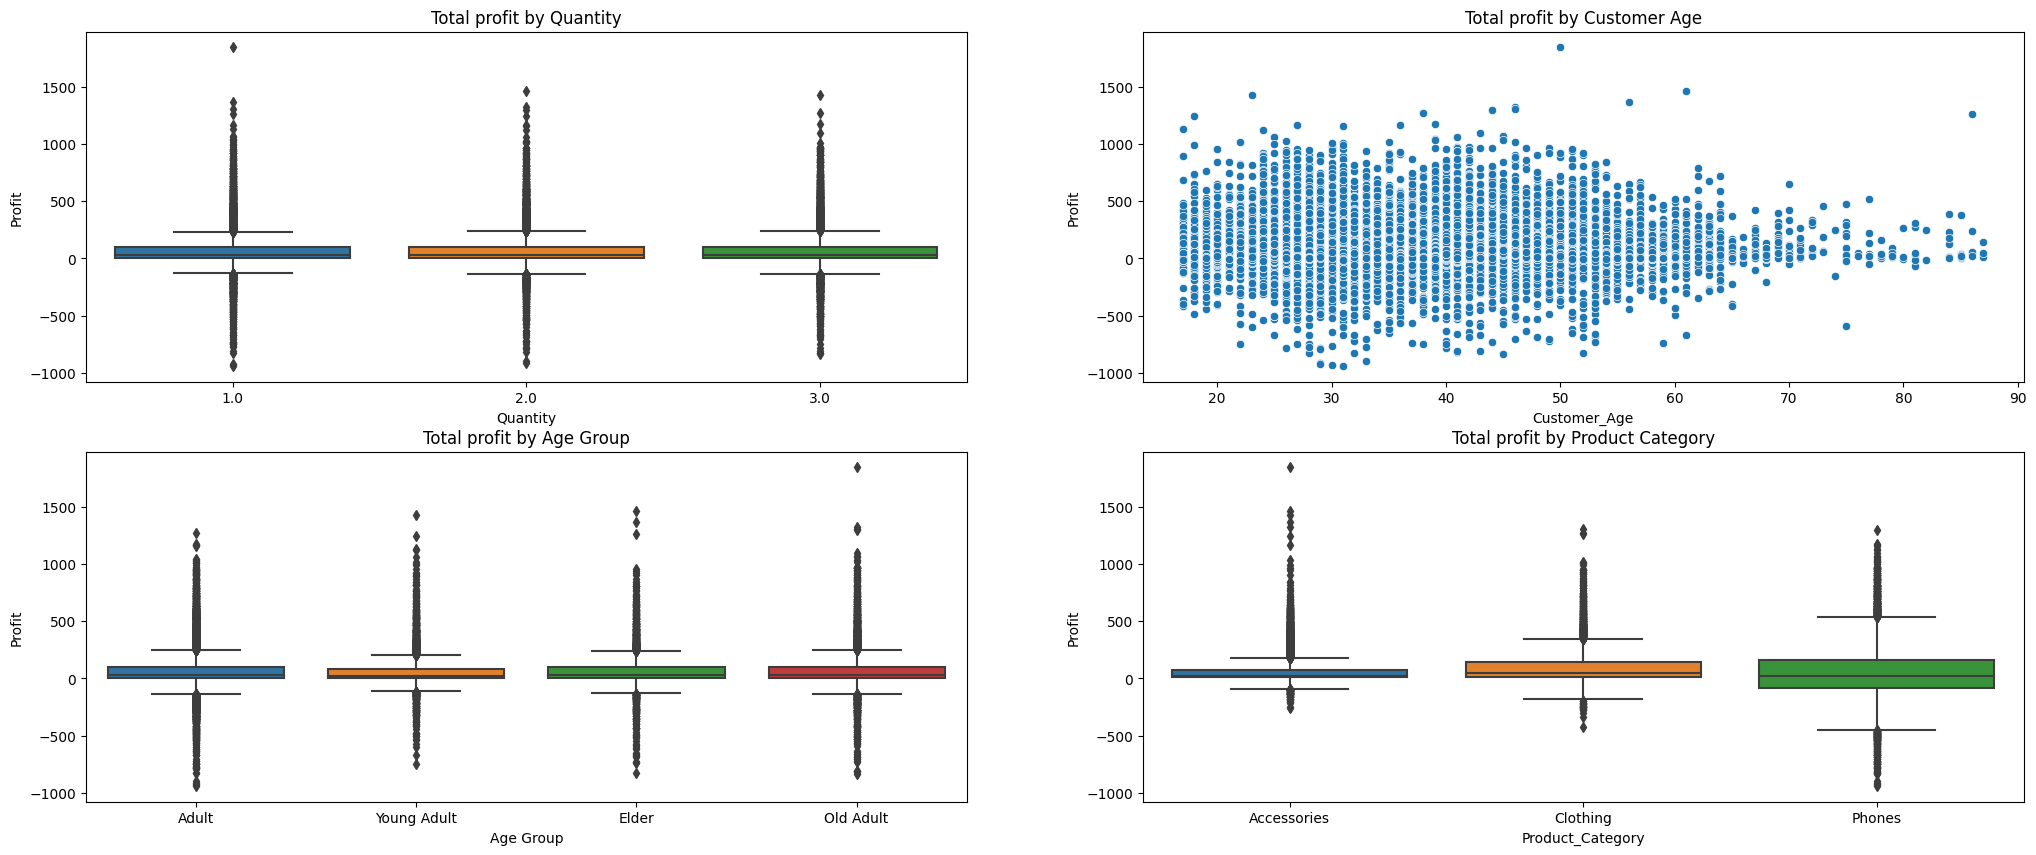

In [40]:
# Profit by numerical colmns/features like Quantity,Unit_Cost ...
# Numerical Bivariate Analysis
# We create four visualizations
fig, axs = plt. subplots(nrows=2 ,ncols=2, figsize=(25,10))

sns.boxplot(x="Quantity", data=data_df, y="Profit", ax=axs[0,0])
axs[0,0].set_title("Total profit by Quantity")

sns.boxplot(x="Product_Category", data=data_df, y="Profit", ax=axs[1,1])
axs[1,1].set_title("Total profit by Product Category")

# sns.scatterplot combines or compares two numeriacl columns against each other. 
sns.scatterplot(x="Customer_Age", data=data_df, y="Profit", ax=axs[0,1])
axs[0,1].set_title("Total profit by Customer Age")

sns.boxplot(x="Age Group", data=data_df, y="Profit", ax=axs[1,0])
axs[1,0].set_title("Total profit by Age Group");





Profit Variation with Quantity:
The boxplot for "Quantity" against "Profit" likely shows how profit varies with the number of items sold. You might observe that higher quantities tend to correlate with higher profits, but there may be outliers where a low quantity still results in significant profit.

Profit Distribution by Product Category:
The boxplot comparing "Product_Category" and "Profit" can reveal which categories yield the highest and lowest profits. Certain categories may consistently show higher median profits, indicating they are more lucrative compared to others.

Impact of Customer Age on Profit:
The scatterplot of "Customer_Age" against "Profit" may illustrate whether there is a trend in profit generation based on customer age. A positive or negative correlation could indicate that certain age groups are more profitable, while the spread of points may suggest variability in profit across different ages.

In [41]:
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

In [42]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31049 entries, 0 to 34865
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              31049 non-null  object
 1   Customer          31049 non-null  object
 2   Sales Person      31049 non-null  object
 3   Customer_Age      31049 non-null  object
 4   Customer_Gender   31049 non-null  object
 5   State             31049 non-null  object
 6   Product_Category  31049 non-null  object
 7   Sub_Category      31049 non-null  object
 8   Payment Option    31049 non-null  object
 9   Quantity          31049 non-null  object
 10  Unit_Cost         31049 non-null  object
 11  Unit_Price        31049 non-null  object
 12  Year              31049 non-null  object
 13  Month             31049 non-null  object
 14  MonthName         31049 non-null  object
 15  Quater            31049 non-null  object
 16  Age Group         31049 non-null  object
 17  Total_Cost       

#### Multivariate Analysis
Multivariate analysis is a statistical technique that allows us to examine the relationships between multiple variables or columns or features. 
That is combining 3 or more columns together .

,Product_Category,Metric,Total
0,Accessories,Total_Cost,5397434.79
1,Clothing,Total_Cost,2668572.81
2,Phones,Total_Cost,9942625.86
3,Accessories,Total_Price,6632978.44
4,Clothing,Total_Price,3173658.93
5,Phones,Total_Price,10272733.63
6,Accessories,Profit,1235543.65
7,Clothing,Profit,505086.12
8,Phones,Profit,330107.77


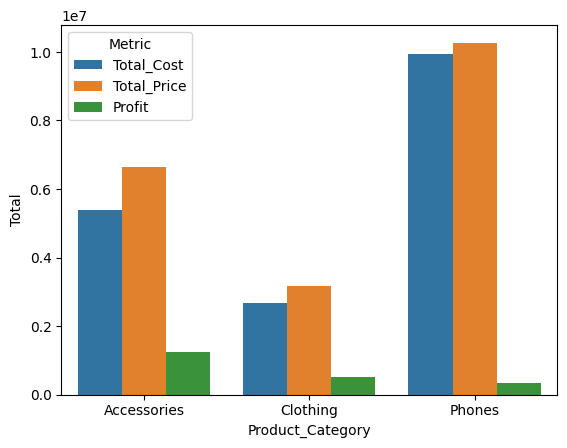

In [43]:
# Product category against cost,price and profit
# Group by to combine the above columns into a variable so it can be used for analysis .
procat = data_df.groupby("Product_Category")[["Total_Cost","Total_Price","Profit"]].sum().reset_index()
# Transpose the procat variable for easy visualization
procat = pd.melt(procat,id_vars="Product_Category", var_name="Metric",value_name="Total")

# Visualize the data.
sns.barplot(data=procat, x="Product_Category", y ="Total", hue="Metric")
procat

Comparison of Total Cost, Price, and Profit by Product Category:
The bar plot will allow you to compare the total cost, total price, and profit for each product category side by side. You may observe that certain categories have significantly higher profits compared to their costs, indicating strong profitability. Conversely, categories with high costs but low profits may signal inefficiencies or pricing issues.

Insights on Profit Margins:
By examining the heights of the bars for "Total Price" and "Total Cost" against "Profit," you can infer profit margins for each category. Categories where the profit bar is substantially shorter than the price bar may indicate lower profit margins, while those where the profit is closer to the price may suggest healthier margins.

Identifying High-Performing Categories:
The visualization can help identify which product categories are the most profitable overall. Categories with high total profits and relatively low total costs can be flagged as high-performing, while those with low profits might need further investigation for potential improvements in pricing or cost management.

In [44]:
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

Using the Date column of pandas datetime dtype for multivariate Analysis

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

<Axes: xlabel='Month', ylabel='Profit'>

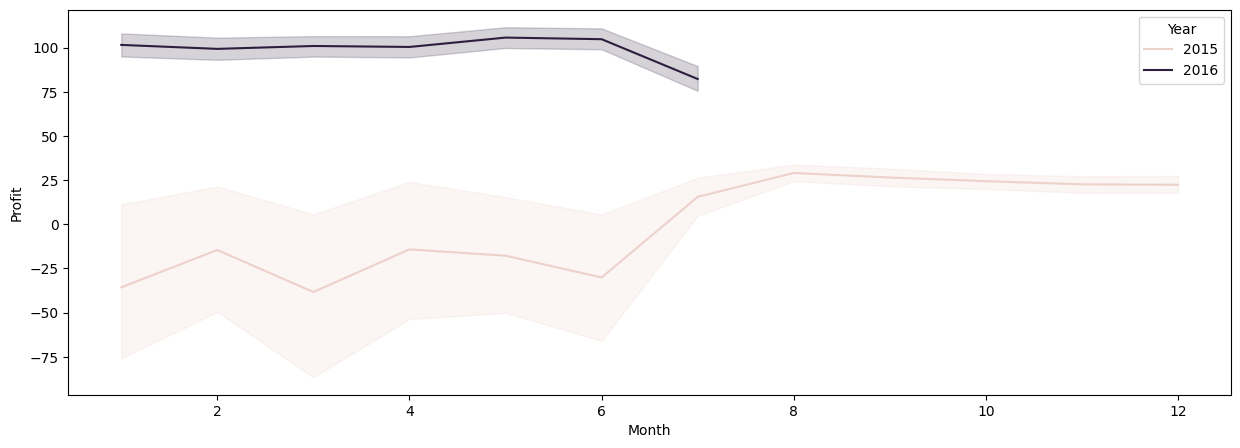

In [45]:
# Using the Date columns and its subnets
# Plot a figure

plt.figure(figsize=(15,5))

# Visualize using the lineplot
sns.lineplot(x="Month", y="Profit", data=data_df, hue="Year")


Profit Trends Over Time
The line plot displays how profit varies across different months, potentially revealing seasonal trends. You may observe certain months with consistently higher profits, indicating peak sales periods, while others may show a decline, suggesting off-peak seasons.

Yearly Comparison:
By using the "Year" hue, the plot allows for a direct comparison of profit trends across different years. This can highlight whether profits are increasing or decreasing over time, indicating the effectiveness of sales strategies or external market conditions.

Monthly Fluctuations:
The visualization may reveal fluctuations in profit within specific months across different years. For instance, if a particular month shows significant growth in one year compared to others, it may suggest successful marketing efforts or new product launches during that time.

#### Using pivot tavle in python

In [46]:
# Using pivot table in python
data_df.pivot_table(values="Profit", index="Year", columns="Month", aggfunc="sum")

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,-4463.73,-2025.7,-5025.81,-2246.73,-3204.53,-5754.68,12931.47,58807.39,53572.4,55553.77,48920.94,67269.13
2016,254290.99,241613.21,274442.73,277581.4,325503.51,330157.86,92813.92,NaN,NaN,NaN,NaN,NaN


The table uses pivot table functionality in pandas dataframe to display the profit by year across all the available months in the data. Where months with negative values incurred loses.

In [47]:
data_df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'Year', 'Month', 'MonthName',
       'Quater', 'Age Group', 'Total_Cost', 'Total_Price', 'Profit',
       'Profit/Loss'],
      dtype='object')

Analysis on the customer gender ,age group and profit

<Axes: xlabel='Customer_Gender', ylabel='Profit'>

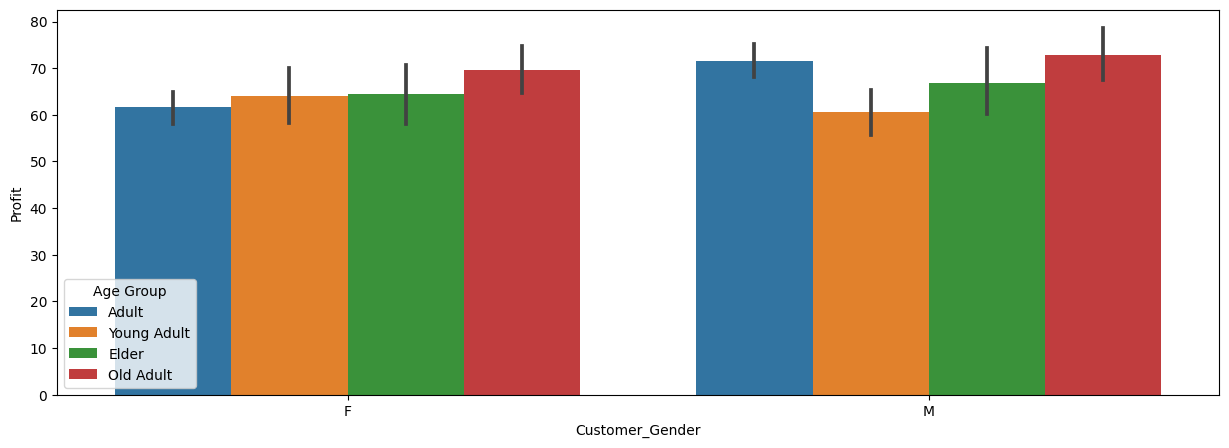

In [48]:
# Customer Gender, Age Group and Profit
# The following code is used to calculate the profit for each customer based on their gender and age group

plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender",y="Profit", data=data_df, hue="Age Group" )

Profit Distribution by Gender:
The bar plot illustrates how profit is distributed across different customer genders. You may notice significant differences in profit between male and female customers, with one gender potentially contributing more to overall profits than the other.

Age Group Influence:
The use of hue to differentiate "Age Group" allows for insights into how age demographics within each gender impact profit. Certain age groups may show higher profits for a specific gender, indicating targeted marketing effectiveness or preferences in purchasing behavior.

Comparative Profit Insights:
The visualization can highlight which combinations of gender and age group are most profitable. For example, if a particular age group of one gender consistently shows higher profits, this could inform future marketing strategies aimed at maximizing sales in those demographics.

#### Correlation
In correlation, we examine a column against another 

In [49]:

ak = data_df.corr()
plt.figure(figsize=(20,5))
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(ak, vmax = .8, square=True, annot=True)

Pairplot


c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

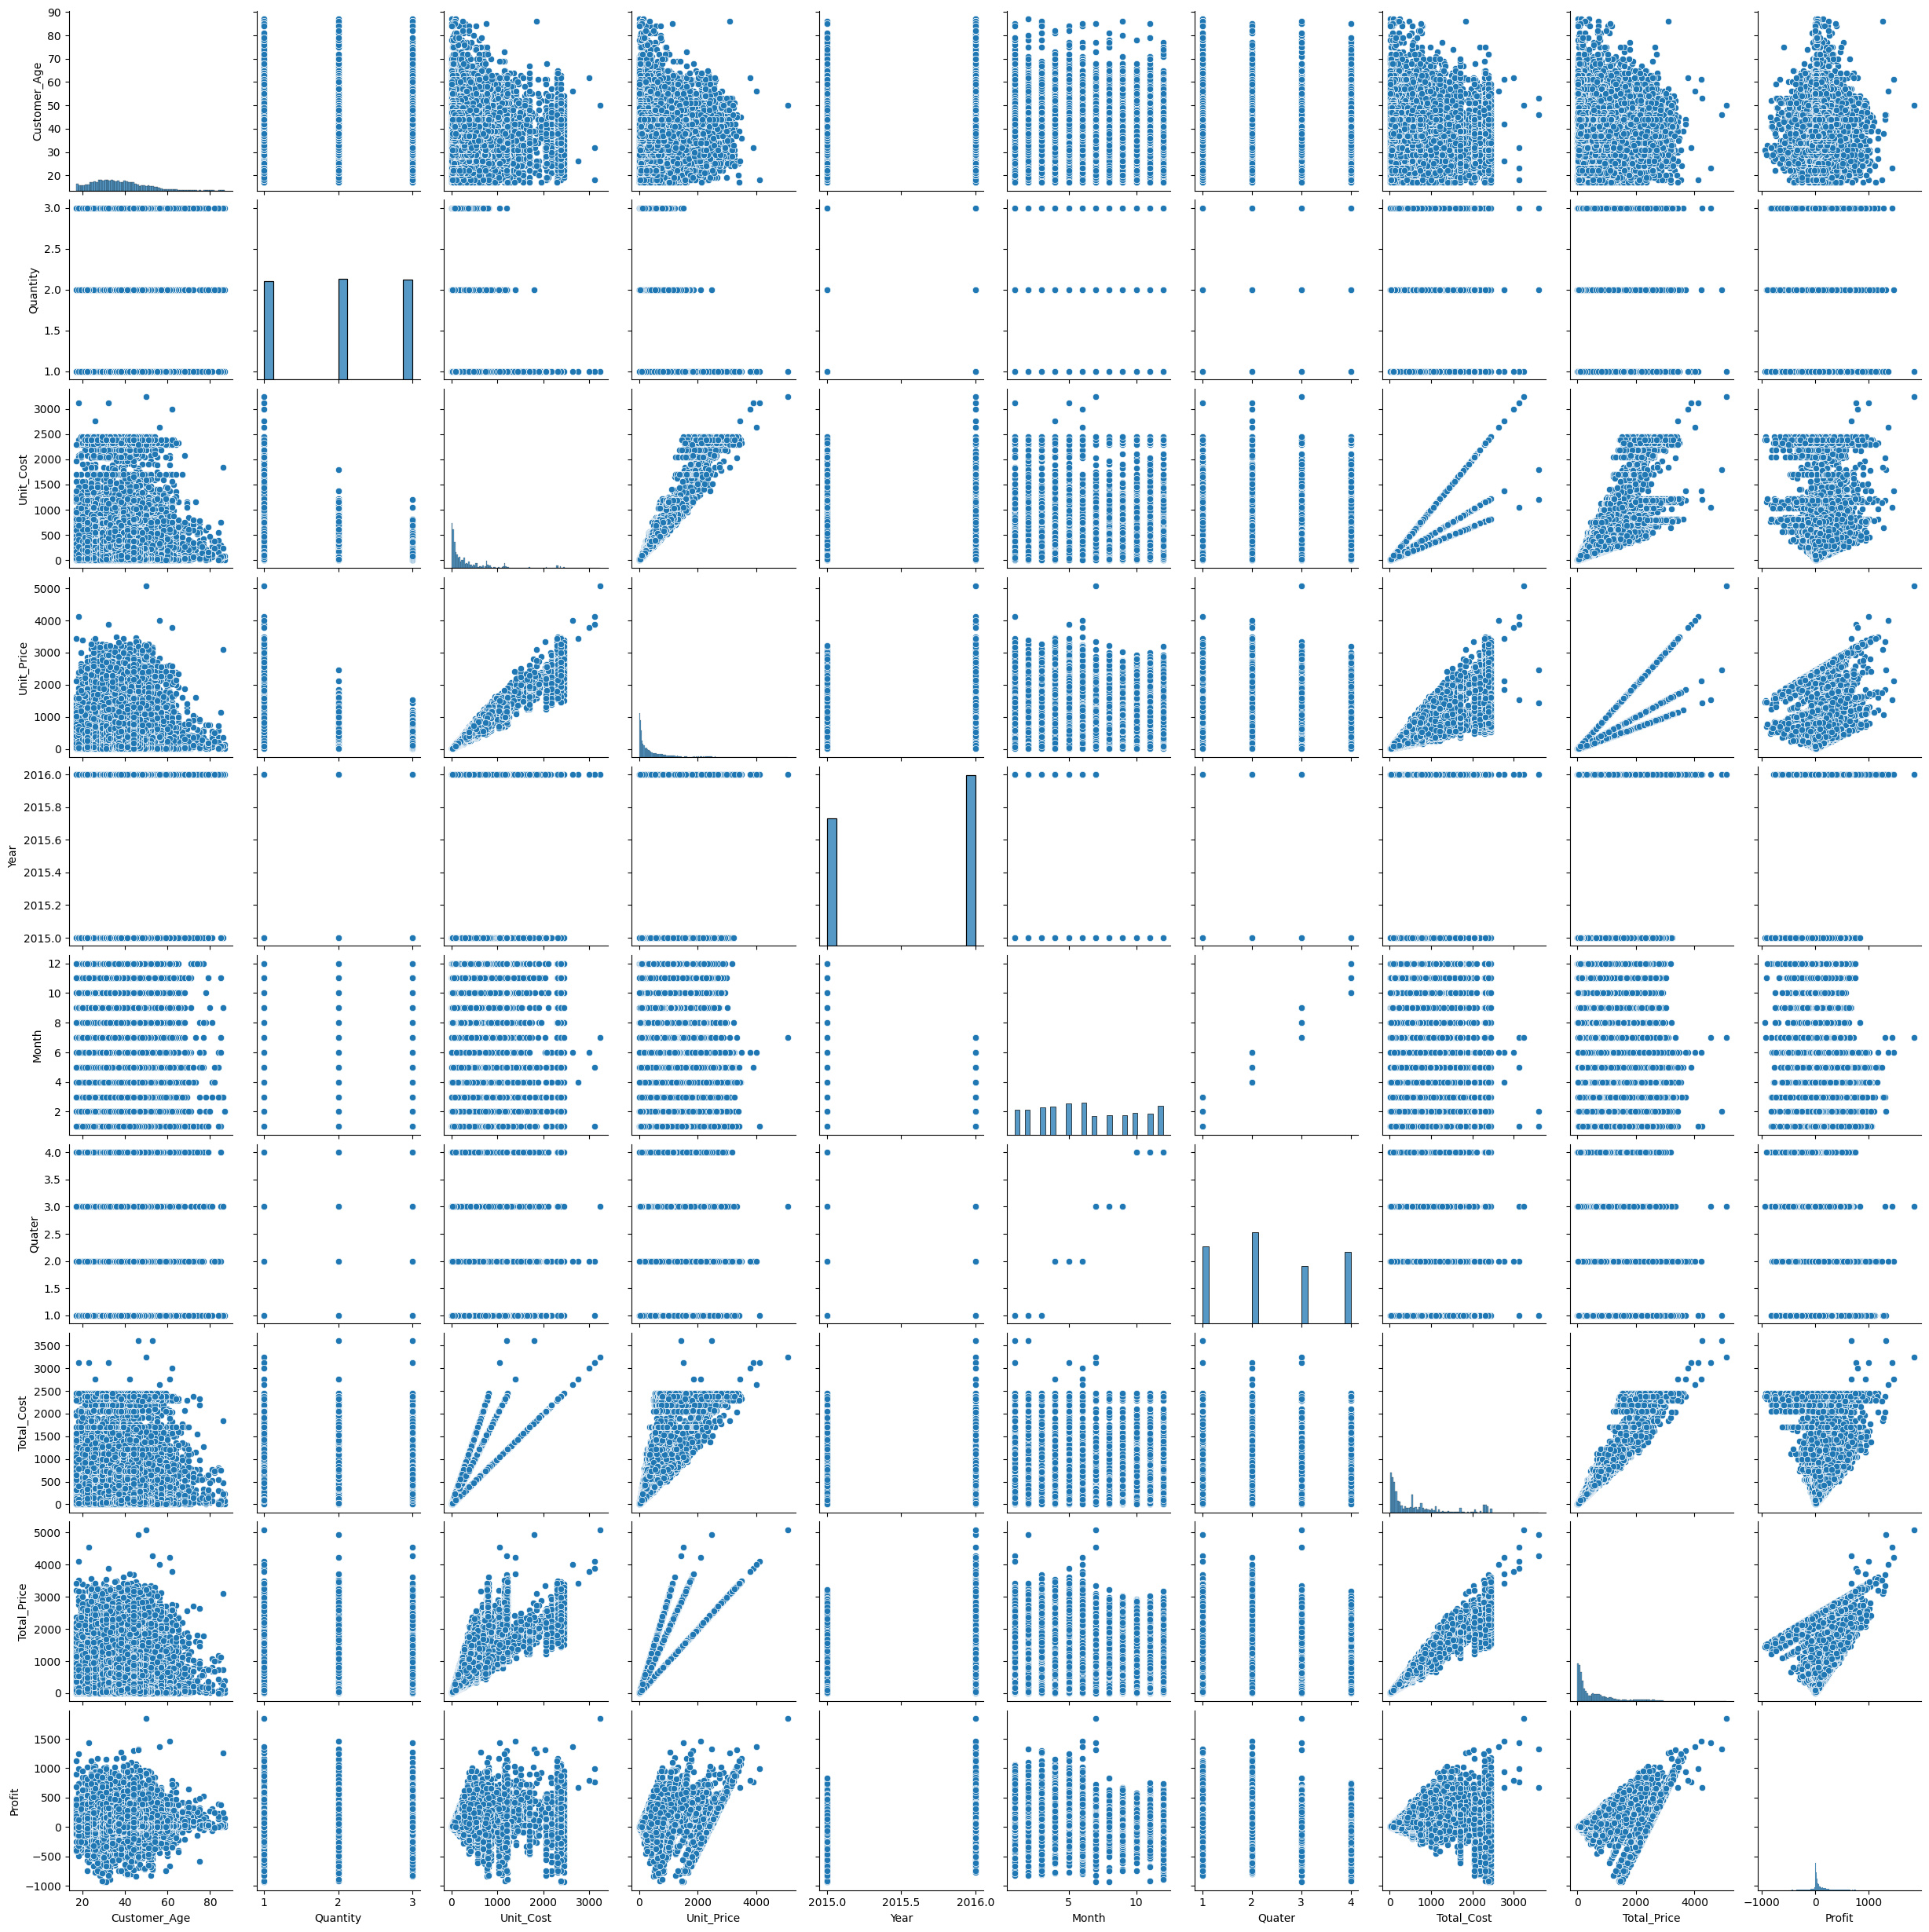

In [50]:
# It works with only numerical columns
sns.pairplot(data_df, height =2.5);